In [20]:
#1. 개인 api key 설정
api_key = "4f9a5b61c0d015b864f8143ef2d8c233fb93e263"                 


In [21]:
import os
import zipfile
import requests
import pandas as pd
import xml.etree.ElementTree as ET  # ET 모듈 임포트 추가
from bs4 import BeautifulSoup

url = f'https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key={api_key}'

In [22]:
file_path = os.getcwd()
print(file_path)

c:\Users\SEUNGJUN\project_file\project_file


In [23]:

# 2. 파일 저장할 폴더 설정
zip_file = os.path.join(file_path, "CORPCODE.zip")
xml_file = os.path.join(file_path, "CORPCODE.xml")

In [24]:
response = requests.get(url)
print(response.status_code)
print(response.content[:500])

200
b"PK\x03\x04\x14\x00\x08\x00\x08\x00q! \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\x00\x00\x00CORPCODE.xml\xdc\xbd[s\x13Y\xb6.\xfa\xbe\x7f\xc5\x8c\xf5p\xa2;\xa2\xf0R\xdet\x89\xc3^;\xd2RbeY\xb7#\xc9P^/;\x12;\xb1\xb3-e\xbau\x81\xf2z2Ff\xbb\xb0)\xa0K\xc2ra\xd3b\x95\xc1\xa6\xb6k\x95\x00C\x89U&\xfa\xbf\xecGg\xea?\x9c92\xe5\x0b\x14Us\x08\xbc#\xa6\x17MS\x94\x1b\xb9\x19#g\x8e9n\xdf\xf7]\xfc\x1f_\x97K\xe4\xbaY\xa9Z\x8e\xfd\xdf\xffI\x18\t\xfd\x131\xed)g\xda\xb2g\xfe\xfb?M\x14/]\x88\xfe\xd3\xff\xf8\x97\xffv\xb1bV\xeb\xa5\xda\xbf\xfc7B\x7f\\,Y\xd5\xc1o\xfd\x7f\x9dr*\xf3\xff\x93~\xc4\xfc\x97PH\x96\xe4PH\xba\xf8\xcf'_\xfb\xe0\xcf\xd9F\xd9\xfc\x17wu\xdb{\xd7\x1c\xfc)\xff+\x1f\xfc)\xd3\x9e\t\xbe\x9e0\xa6\x1c\x02_r*F\x8d\xfe\x15\x07\x9f9\xfe\xdfO>W\xad9Ss\xc1\xff%\xb9\xf8\xcf\xa7\xfe\xed\xe4\x8f\x94\xa9Y\xd7\x16\xfe\xe7\xb4Q3\xffE\x0c\t\x91PX\n]\xfc\xe7\xd3_\r\xec\xfb\xe7\x13\x03\xff\xd8\xd6P,,\xb3l=|\xfd\x0f\xaf\xb5\xed\xad\xb7\xbd\xf5\xfb\xde\x9dm\x8c\xd1c\x8e3M\xfe\x1f\xa3<\xff\xff\

In [25]:
# 3. CORPCODE.zip 파일 다운로드
response = requests.get(url)
# 4. API에서 에러가 왔는지 확인
if b"<result>" in response.content:
    print("❌ API 호출 실패! 인증키가 틀렸거나 문제가 있어요.")
    print(response.text)
else:
    # 5. 받은 파일을 CORPCODE.zip으로 저장
    with open(zip_file, 'wb') as f:
        f.write(response.content)
    print("✅ CORPCODE.zip 파일 저장 완료!")

    # 6. zip 파일 압축 풀기 → 같은 폴더에 CORPCODE.xml 생김
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(file_path)
    print("✅ 압축 풀기 완료!")

✅ CORPCODE.zip 파일 저장 완료!
✅ 압축 풀기 완료!


In [26]:
# XML 파일 열기
tree = ET.parse('CORPCODE.xml')
root = tree.getroot()

# 최상위 태그 출력
print("📌 Root 태그:", root.tag)

# 자식 태그들 중 앞 3개만 살펴보기
for i, list_elem in enumerate(root.findall('list')[:3]):
    print(f"\n🔹 <list> #{i+1} 안의 구조:")
    for child in list_elem:
        print(f" - 태그: {child.tag}, 값 예시: {child.text}")


📌 Root 태그: result

🔹 <list> #1 안의 구조:
 - 태그: corp_code, 값 예시: 00434003
 - 태그: corp_name, 값 예시: 다코
 - 태그: corp_eng_name, 값 예시: Daco corporation
 - 태그: stock_code, 값 예시:  
 - 태그: modify_date, 값 예시: 20170630

🔹 <list> #2 안의 구조:
 - 태그: corp_code, 값 예시: 00430964
 - 태그: corp_name, 값 예시: 굿앤엘에스
 - 태그: corp_eng_name, 값 예시: Good & LS Co.,Ltd.
 - 태그: stock_code, 값 예시:  
 - 태그: modify_date, 값 예시: 20170630

🔹 <list> #3 안의 구조:
 - 태그: corp_code, 값 예시: 00388953
 - 태그: corp_name, 값 예시: 크레디피아제이십오차유동화전문회사
 - 태그: corp_eng_name, 값 예시: Credipia 25th Asset Securitization Specialty L.L.C
 - 태그: stock_code, 값 예시:  
 - 태그: modify_date, 값 예시: 20170630


In [27]:
# 7. XML 파싱 (BeautifulSoup 대신 내장 모듈 `xml.etree` 사용)
tree = ET.parse(xml_file)  # 파일 직접 로드
root = tree.getroot()

# 8. 모든 <list> 태그 추출 → 딕셔너리 리스트로 변환
company_data = []
for item in root.findall('list'):
    company = {child.tag: child.text for child in item}  # 한 줄로 간결하게
    company_data.append(company)

# 9. DataFrame 생성
corp_code_df = pd.DataFrame(company_data)
print("✅ 파싱 완료 - 총", len(corp_code_df), "개 기업 데이터")
print(corp_code_df.head())  # 상위 5행만 출력
# 공시대상 회사의 고유번호 8자리를 부여 받은 기업의 수

✅ 파싱 완료 - 총 112785 개 기업 데이터
  corp_code          corp_name  \
0  00434003                 다코   
1  00430964              굿앤엘에스   
2  00388953  크레디피아제이십오차유동화전문회사   
3  00179984             연방건설산업   
4  00420143     브룩스피알아이오토메이션잉크   

                                       corp_eng_name stock_code modify_date  
0                                   Daco corporation               20170630  
1                                 Good & LS Co.,Ltd.               20170630  
2  Credipia 25th Asset Securitization Specialty L...               20170630  
3                                           youn bao               20170630  
4                        BROOKS-PRI Automation, Inc.               20170630  


In [28]:
# 1. stock_code가 ' '이 아닌 기업만 추출 (즉, 상장 회사만)
pub_com = corp_code_df[corp_code_df['stock_code'] != ' '].reset_index(drop=True)

# 2. 각 열(column)에 데이터가 몇 개 있는지 확인 (결측치 없이 잘 들어왔는지 보기)
print(pub_com.count())
print(pub_com.head())


corp_code        3871
corp_name        3871
corp_eng_name    3871
stock_code       3871
modify_date      3871
dtype: int64
  corp_code corp_name                              corp_eng_name stock_code  \
0  00260985      한빛네트                            HanbitNet, Inc.     036720   
1  00264529      엔플렉스                                 Nplex,Inc.     040130   
2  00358545    동서정보기술  Dong Seo Information Technology Co., Ltd.     055000   
3  00231567     애드모바일                                                032600   
4  00359614       리더컴                        LEADER COMM.Co.,Ltd     056140   

  modify_date  
0    20170630  
1    20170630  
2    20170630  
3    20170630  
4    20170630  


In [29]:
# pub_com 데이터프레임의 상위 5개 데이터를 확인하는 코드
pub_com.head()

,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,00260985,한빛네트,"HanbitNet, Inc.",036720,20170630
1,00264529,엔플렉스,"Nplex,Inc.",040130,20170630
2,00358545,동서정보기술,"Dong Seo Information Technology Co., Ltd.",055000,20170630
3,00231567,애드모바일,,032600,20170630
4,00359614,리더컴,"LEADER COMM.Co.,Ltd",056140,20170630


In [31]:
pub_com.modify_date.value_counts().sort_index(ascending=False)[:10]

modify_date
20250630    8
20250627    4
20250626    4
20250625    3
20250624    5
20250623    4
20250620    4
20250619    3
20250618    8
20250617    6
Name: count, dtype: int64

In [30]:
# 상장기업의 고유번호 csv 파일로 저장
pub_com.to_csv("./CORPCODE_2024.csv", index=False)    

# 상장기업의 고유번호 csv 파일을 불러오기
pub_com = pd.read_csv("./CORPCODE_2024.csv")
# pub_com 데이터프레임의 상위 5개 데이터를 확인하는 코드
pub_com.head()

,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,260985,한빛네트,"HanbitNet, Inc.",36720,20170630
1,264529,엔플렉스,"Nplex,Inc.",40130,20170630
2,358545,동서정보기술,"Dong Seo Information Technology Co., Ltd.",55000,20170630
3,231567,애드모바일,,32600,20170630
4,359614,리더컴,"LEADER COMM.Co.,Ltd",56140,20170630


In [32]:
print(os.getcwd())

c:\Users\SEUNGJUN\project_file\project_file


In [33]:
import pandas as pd
# 상장기업의 고유번호 csv 파일을 불러오기
pub_com = pd.read_csv("./CORPCODE_2024.csv")
# pub_com 데이터프레임의 상위 5개 데이터를 확인하는 코드
pub_com.head()
pub_com.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871 entries, 0 to 3870
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   corp_code      3871 non-null   int64 
 1   corp_name      3871 non-null   object
 2   corp_eng_name  3871 non-null   object
 3   stock_code     3871 non-null   int64 
 4   modify_date    3871 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 151.3+ KB


In [ ]:
# corp_code(고유번호)의 데이터값에 0을 붙여 8자리로 만드는 코드
pub_com['corp_code']=pub_com['corp_code'].astype(str).str.zfill(8)
# stock_code(종목코드)의 데이터값에 0을 붙여 6자리로 만드는 코드
pub_com['stock_code']=pub_com['stock_code'].astype(str).str.zfill(6)
# corp_name 열의 데이터값에 포함된 공백을 지워 corp_name 열을 재생성하는 코드
pub_com['corp_name'] = pub_com['corp_name'].str.replace(' ','')
# pub_com 데이터프레임의 상위 5개 데이터를 확인하는 코드
pub_com[:20]

,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,00260985,한빛네트,"HanbitNet, Inc.",036720,20170630
1,00264529,엔플렉스,"Nplex,Inc.",040130,20170630
2,00358545,동서정보기술,"Dong Seo Information Technology Co., Ltd.",055000,20170630
3,00231567,애드모바일,,032600,20170630
4,00359614,리더컴,"LEADER COMM.Co.,Ltd",056140,20170630


In [ ]:
#만약 기업명을 검색하여 corp_code를 포함한 데이터 프레임을 반환하고 싶다면

search = input("검색할 기업명을 포괄적으로 입력하세요:").strip().replace(" ","")
search_data = pub_com[pub_com['corp_name'].str.contains(search, case=False, na=False)].reset_index(drop=True)
print(f"총 {len(search_data)}건의 검색결과")
search_data

총 8건의 검색결과


,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,00148540,CJ,CJ Corp.,001040,20230109
1,01071041,CJ바이오사이언스,CJ Bioscience,311690,20230214
2,00127954,CJ프레시웨이,CJ Freshway Corporation,051500,20240626
3,00265324,CJENM,"CJ ENM CO., Ltd.",035760,20250207
4,00129013,CJ씨푸드,CJ SEAFOOD CORPORATION,011150,20250106
5,00303873,CJCGV,"CJ CGV CO.,LTD.",079160,20250326
6,00113410,CJ대한통운,CJ Logistics Corporation,000120,20240326
7,00635134,CJ제일제당,CJ CHEILJEDANG CORP.,097950,20240701


In [56]:
print(search_data)

  corp_code  corp_name              corp_eng_name stock_code  modify_date
0  00148540         CJ                   CJ Corp.     001040     20230109
1  01071041  CJ바이오사이언스              CJ Bioscience     311690     20230214
2  00127954    CJ프레시웨이    CJ Freshway Corporation     051500     20240626
3  00265324      CJENM           CJ ENM CO., Ltd.     035760     20250207
4  00129013      CJ씨푸드     CJ SEAFOOD CORPORATION     011150     20250106
5  00303873      CJCGV            CJ CGV CO.,LTD.     079160     20250326
6  00113410     CJ대한통운  CJ Logistics Corporation      000120     20240326
7  00635134     CJ제일제당       CJ CHEILJEDANG CORP.     097950     20240701


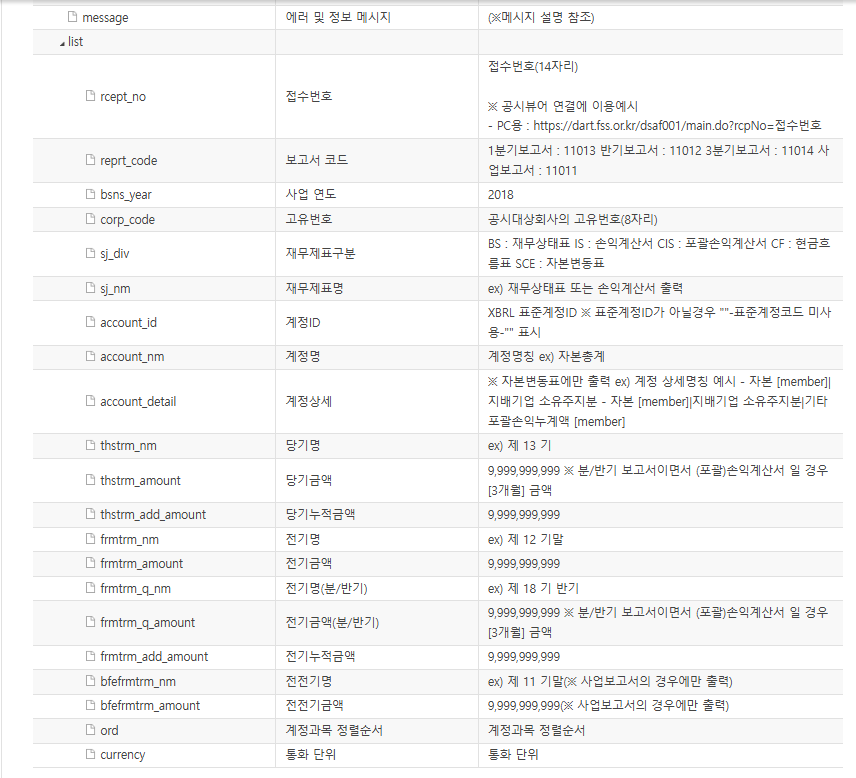

In [57]:
search_data

,corp_code,corp_name,corp_eng_name,stock_code,modify_date
0,00148540,CJ,CJ Corp.,001040,20230109
1,01071041,CJ바이오사이언스,CJ Bioscience,311690,20230214
2,00127954,CJ프레시웨이,CJ Freshway Corporation,051500,20240626
3,00265324,CJENM,"CJ ENM CO., Ltd.",035760,20250207
4,00129013,CJ씨푸드,CJ SEAFOOD CORPORATION,011150,20250106
5,00303873,CJCGV,"CJ CGV CO.,LTD.",079160,20250326
6,00113410,CJ대한통운,CJ Logistics Corporation,000120,20240326
7,00635134,CJ제일제당,CJ CHEILJEDANG CORP.,097950,20240701


In [59]:
import pandas as pd
import requests
import json

# 1. '검색한 값'이 포함된 데이터 추출
search_data.info()

# 2. 필요한 변수 설정
corp_code = search_data.iloc[3, 0]  # search_data 데이터프레임의 4번째 행 첫 번째 열 값 (기업 고유번호)
corp_name = search_data.iloc[3, 1]  # search_data 데이터프레임의 4번째 행 두 번째 열 값 (기업 이름)

# 사업연도, API 키, 보고서 코드, 재무제표 유형 설정
bs_years = range(2015, 2025)  # 사업연도 범위 (2015년부터 2024년까지)
reprt_code = 11011  # 사업보고서 코드 (11013: 1분기보고서, 11012: 반기보고서, 11014: 3분기보고서, 11011: 사업보고서)
fs_div = 'CFS'      # 연결재무제표 (CFS: 연결재무제표, OFS: 개별재무제표)

# 결과 저장할 데이터프레임 초기화
columns = ['corp_code', 'corp_name', 'bsns_year', 'sj_div', 
           'account_nm', 'thstrm_nm', 'thstrm_amount', 
           'frmtrm_nm', 'frmtrm_amount']
df_rslt = pd.DataFrame(columns=columns)  # 빈 데이터프레임 생성

# 3. API 호출 및 데이터 저장
data_list = []  # 데이터를 임시로 저장할 리스트 생성

for year in bs_years:  # 설정한 연도(bs_years) 범위를 순회
    response = requests.get(
        f"https://opendart.fss.or.kr/api/fnlttSinglAcntAll.json?crtfc_key={api_key}&corp_code={corp_code}&bsns_year={year}&reprt_code={reprt_code}&fs_div={fs_div}"
    )
    data = response.json()  # 응답 데이터를 JSON 형식으로 변환

    if 'list' in data:  # 응답 데이터에 'list' 키가 있는 경우 (유효한 재무 데이터가 있는 경우)
        for item in data['list']:  # 리스트 내 각 항목(item)을 순회하며 처리
            data_list.append({  # 데이터를 딕셔너리 형태로 리스트에 추가
                'corp_code': corp_code,           # 기업 고유번호
                'corp_name': corp_name,           # 기업 이름
                'bsns_year': item["bsns_year"],   # 사업연도
                'sj_div': item["sj_div"],         # 재무제표 구분 (예: 재무상태표, 손익계산서 등)
                'account_nm': item["account_nm"], # 계정명 (예: 자산, 부채 등)
                'thstrm_nm': item["thstrm_nm"],   # 당기명 (예: 제10기)
                'thstrm_amount': item["thstrm_amount"],   # 당기금액
                'frmtrm_nm': item["frmtrm_nm"],   # 전기명 (예: 제9기)
                'frmtrm_amount': item["frmtrm_amount"]    # 전기금액
            })

# 리스트를 데이터프레임으로 변환
df_rslt = pd.DataFrame(data_list)

# 결과 확인
df_rslt  # 최종적으로 수집된 데이터를 출력하여 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   corp_code      8 non-null      object
 1   corp_name      8 non-null      object
 2   corp_eng_name  8 non-null      object
 3   stock_code     8 non-null      object
 4   modify_date    8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


,corp_code,corp_name,bsns_year,sj_div,account_nm,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount
0,00265324,CJENM,2015,BS,유동자산,제 22 기,758534402154,제 21 기,802537812742
1,00265324,CJENM,2015,BS,현금및현금성자산,제 22 기,325848637455,제 21 기,269321110765
2,00265324,CJENM,2015,BS,단기금융상품,제 22 기,22730000000,제 21 기,38321150686
3,00265324,CJENM,2015,BS,매출채권및기타채권,제 22 기,320061700241,제 21 기,383273793091
4,00265324,CJENM,2015,BS,만기보유금융자산,제 22 기,,제 21 기,
...,...,...,...,...,...,...,...,...,...
2289,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,21513049648,제 30 기,-55764928421
2290,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,0,제 30 기,0
2291,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,0,제 30 기,0
2292,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,21513049648,제 30 기,-55764928421


In [60]:
df_rslt

,corp_code,corp_name,bsns_year,sj_div,account_nm,thstrm_nm,thstrm_amount,frmtrm_nm,frmtrm_amount
0,00265324,CJENM,2015,BS,유동자산,제 22 기,758534402154,제 21 기,802537812742
1,00265324,CJENM,2015,BS,현금및현금성자산,제 22 기,325848637455,제 21 기,269321110765
2,00265324,CJENM,2015,BS,단기금융상품,제 22 기,22730000000,제 21 기,38321150686
3,00265324,CJENM,2015,BS,매출채권및기타채권,제 22 기,320061700241,제 21 기,383273793091
4,00265324,CJENM,2015,BS,만기보유금융자산,제 22 기,,제 21 기,
...,...,...,...,...,...,...,...,...,...
2289,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,21513049648,제 30 기,-55764928421
2290,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,0,제 30 기,0
2291,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,0,제 30 기,0
2292,00265324,CJENM,2024,SCE,지분법자본변동,제 31 기,21513049648,제 30 기,-55764928421


In [ ]:
''' df_rslt 데이터프레임에서 account_nm(계정명)에 ‘지배기업’이 포함되어 있고, sj_div(재무제표구분)이 ‘재무상태표’인 데이터의 
corp_code(고유번호), corp_name(정식명칭), bsns_year(사업연도), thstrm_amount(당기금액), frmtrm_amount(전기금액)을 추출 '''
equity=df_rslt[(df_rslt['account_nm'].str.contains('지배기업'))&(df_rslt['sj_div']=='BS')]\
   [['corp_code','corp_name','bsns_year','account_nm','thstrm_amount','frmtrm_amount']]
print(equity)
print(equity.info())


     corp_code corp_name bsns_year  account_nm    thstrm_amount  \
41    00126380      삼성전자      2015  지배기업 소유주지분  172876767000000   
226   00126380      삼성전자      2016  지배기업 소유주지분  186424328000000   
415   00126380      삼성전자      2017  지배기업 소유주지분  207213416000000   
617   00126380      삼성전자      2018  지배기업 소유주지분  240068993000000   
832   00126380      삼성전자      2019  지배기업 소유주지분  254915472000000   
1040  00126380      삼성전자      2020  지배기업 소유주지분  267670331000000   
1248  00126380      삼성전자      2021  지배기업 소유주지분  296237697000000   
1434  00126380      삼성전자      2022  지배기업 소유주지분  345186142000000   
1599  00126380      삼성전자      2023  지배기업 소유주지분  353233775000000   
1775  00126380      삼성전자      2024  지배기업 소유주지분  391687603000000   

        frmtrm_amount  
41    162181725000000  
226   172876767000000  
415   186424328000000  
617   207213416000000  
832   240068993000000  
1040  254915472000000  
1248  267670331000000  
1434  296237697000000  
1599  345186142000000  
1775  353233775000000 

In [ ]:
# thstrm_amount(당기금액)을 thstrm_equity(당기자본금)으로,
# frmtrm_amount(전기금액)을 frmtrm_equity(전기자본금)으로 열 이름 변경
equity.rename(columns={
    'thstrm_amount': 'thstrm_equity',  # 당기금액 → 당기자본금
    'frmtrm_amount': 'frmtrm_equity'   # 전기금액 → 전기자본금
}, inplace=True)

# thstrm_equity(당기자본금)과 frmtrm_equity(전기자본금)의 값을 정수형으로 변환
equity[['thstrm_equity', 'frmtrm_equity']] = equity[['thstrm_equity', 'frmtrm_equity']].apply(pd.to_numeric)

# 평균 자본(Avg_equity)을 계산하여 새로운 열 추가
equity['Avg_equity'] = equity[['thstrm_equity', 'frmtrm_equity']].mean(axis=1)  # 행 기준 평균 계산

# equity 데이터프레임 전체 확인
print(equity)  # 최종 결과 출력

     corp_code corp_name bsns_year  account_nm    thstrm_equity  \
41    00126380      삼성전자      2015  지배기업 소유주지분  172876767000000   
226   00126380      삼성전자      2016  지배기업 소유주지분  186424328000000   
415   00126380      삼성전자      2017  지배기업 소유주지분  207213416000000   
617   00126380      삼성전자      2018  지배기업 소유주지분  240068993000000   
832   00126380      삼성전자      2019  지배기업 소유주지분  254915472000000   
1040  00126380      삼성전자      2020  지배기업 소유주지분  267670331000000   
1248  00126380      삼성전자      2021  지배기업 소유주지분  296237697000000   
1434  00126380      삼성전자      2022  지배기업 소유주지분  345186142000000   
1599  00126380      삼성전자      2023  지배기업 소유주지분  353233775000000   
1775  00126380      삼성전자      2024  지배기업 소유주지분  391687603000000   

        frmtrm_equity    Avg_equity  
41    162181725000000  1.675292e+14  
226   172876767000000  1.796505e+14  
415   186424328000000  1.968189e+14  
617   207213416000000  2.236412e+14  
832   240068993000000  2.474922e+14  
1040  254915472000000  2.612929e+1

In [ ]:
''' df_rslt 데이터프레임에서 account_nm(계정명)에 ‘지배기업’, account_nm(계정명)에 ‘당기순이익’이 포함되어 있고, sj_div(재무제표구분)이 ‘손익계산서’인 데이터의 
corp_code(고유번호), corp_name(정식명칭), bsns_year(사업연도), thstrm_amount(당기금액)을 추출하는 코드 '''
Return = df_rslt[(df_rslt['account_nm'].str.contains('지배기업'))&
(df_rslt['account_nm'].str.contains('당기순이익'))&
(df_rslt['sj_div']=='IS')][['corp_code','corp_name','bsns_year','thstrm_amount']]

# thstrm_amount(당기금액)을 thstrm_return(당기순이익)으로 이름을 변경
Return.rename(columns={'thstrm_amount' : 'thstrm_return'},inplace=True)
# thstrm_return(당기순이익)의 데이터값을 정수로 변경
Return['thstrm_return']=Return['thstrm_return'].apply(pd.to_numeric)

# Return데이터프레임 전체를 확인하는 코드
Return

,corp_code,corp_name,bsns_year,thstrm_return
66,00126380,삼성전자,2015,18694628000000
251,00126380,삼성전자,2016,22415655000000
440,00126380,삼성전자,2017,41344569000000
642,00126380,삼성전자,2018,43890877000000
856,00126380,삼성전자,2019,21505054000000
1065,00126380,삼성전자,2020,26090846000000
1273,00126380,삼성전자,2021,39243791000000
1459,00126380,삼성전자,2022,54730018000000
1642,00126380,삼성전자,2023,14473401000000


In [ ]:
# corp_code(고유번호), corp_name(정식명칭), bsns_year(사업연도)를 
# 조인키(join key)로 하여 하나의 데이터프레임(ROE)으로 만드는 코드
ROE=pd.merge(equity,Return,on=['corp_code','corp_name','bsns_year'],how='inner')
ROE

,corp_code,corp_name,bsns_year,account_nm,thstrm_equity,frmtrm_equity,Avg_equity,thstrm_return
0,00126380,삼성전자,2015,지배기업 소유주지분,172876767000000,162181725000000,1.675292e+14,18694628000000
1,00126380,삼성전자,2016,지배기업 소유주지분,186424328000000,172876767000000,1.796505e+14,22415655000000
2,00126380,삼성전자,2017,지배기업 소유주지분,207213416000000,186424328000000,1.968189e+14,41344569000000
3,00126380,삼성전자,2018,지배기업 소유주지분,240068993000000,207213416000000,2.236412e+14,43890877000000
4,00126380,삼성전자,2019,지배기업 소유주지분,254915472000000,240068993000000,2.474922e+14,21505054000000
5,00126380,삼성전자,2020,지배기업 소유주지분,267670331000000,254915472000000,2.612929e+14,26090846000000
6,00126380,삼성전자,2021,지배기업 소유주지분,296237697000000,267670331000000,2.819540e+14,39243791000000
7,00126380,삼성전자,2022,지배기업 소유주지분,345186142000000,296237697000000,3.207119e+14,54730018000000
8,00126380,삼성전자,2023,지배기업 소유주지분,353233775000000,345186142000000,3.492100e+14,14473401000000


In [ ]:

# ROE를 계산하는 코드
ROE['ROE'] = ROE['thstrm_return']/ROE['Avg_equity']*100

# ROE데이터프레임 전체를 확인하는 코드
ROE

,corp_code,corp_name,bsns_year,account_nm,thstrm_equity,frmtrm_equity,Avg_equity,thstrm_return,ROE
0,00126380,삼성전자,2015,지배기업 소유주지분,172876767000000,162181725000000,1.675292e+14,18694628000000,11.159024
1,00126380,삼성전자,2016,지배기업 소유주지분,186424328000000,172876767000000,1.796505e+14,22415655000000,12.477365
2,00126380,삼성전자,2017,지배기업 소유주지분,207213416000000,186424328000000,1.968189e+14,41344569000000,21.006405
3,00126380,삼성전자,2018,지배기업 소유주지분,240068993000000,207213416000000,2.236412e+14,43890877000000,19.625577
4,00126380,삼성전자,2019,지배기업 소유주지분,254915472000000,240068993000000,2.474922e+14,21505054000000,8.689183
5,00126380,삼성전자,2020,지배기업 소유주지분,267670331000000,254915472000000,2.612929e+14,26090846000000,9.985287
6,00126380,삼성전자,2021,지배기업 소유주지분,296237697000000,267670331000000,2.819540e+14,39243791000000,13.918508
7,00126380,삼성전자,2022,지배기업 소유주지분,345186142000000,296237697000000,3.207119e+14,54730018000000,17.065165
8,00126380,삼성전자,2023,지배기업 소유주지분,353233775000000,345186142000000,3.492100e+14,14473401000000,4.144613


In [ ]:
# 조건에 맞는 데이터 필터링
oper = df_rslt[
    df_rslt['account_nm'].str.contains('영업이익') &  # '영업이익' 포함
    (df_rslt['sj_div'] == 'IS')&                 # 'sj_div'가 'IS'
    ~df_rslt['account_nm'].str.contains('계속')    # '계속' 미포함
][['corp_code','corp_name', 'bsns_year','account_nm' ,'thstrm_amount']]  # 필요한 열만 선택

# 열 이름 변경 및 데이터 타입 변환
oper = oper.rename(columns={'thstrm_amount': 'thstrm_oper'})  # 열 이름 변경
oper['thstrm_oper'] = pd.to_numeric(oper['thstrm_oper'])      # 숫자형으로 변환

# 결과 확인
oper

,corp_code,corp_name,bsns_year,account_nm,thstrm_oper
1745,00126380,삼성전자,2015,영업이익(손실),26413442000000
1930,00126380,삼성전자,2016,영업이익(손실),29240672000000
2119,00126380,삼성전자,2017,영업이익(손실),53645038000000
2321,00126380,삼성전자,2018,영업이익(손실),58886669000000
2535,00126380,삼성전자,2019,영업이익(손실),27768509000000
2744,00126380,삼성전자,2020,영업이익,35993876000000
2952,00126380,삼성전자,2021,영업이익,51633856000000
3138,00126380,삼성전자,2022,영업이익,43376630000000
3318,00126380,삼성전자,2023,영업이익,6566976000000
3494,00126380,삼성전자,2024,영업이익,32725961000000


In [ ]:
# 조건에 맞는 데이터 필터링
sales = df_rslt[
    df_rslt['account_nm'].str.contains('매출액') &  # '매출액' 포함
    df_rslt['sj_div'].isin(['IS', 'CIS'])          # 'sj_div'가 'IS' 또는 'CIS'
][['corp_code', 'corp_name', 'bsns_year', 'thstrm_amount']]  # 필요한 열만 선택

# 열 이름 변경 및 데이터 타입 변환
sales.rename(columns={'thstrm_amount': 'thstrm_sales'}, inplace=True)  # 열 이름 변경
sales['thstrm_sales'] = pd.to_numeric(sales['thstrm_sales'])          # 숫자형으로 변환

# 결과 확인 (상위 10개 출력)
sales.head(10)

,corp_code,corp_name,bsns_year,thstrm_sales
52,00126380,삼성전자,2015,200653482000000
237,00126380,삼성전자,2016,201866745000000
426,00126380,삼성전자,2017,239575376000000
628,00126380,삼성전자,2018,243771415000000
842,00126380,삼성전자,2019,230400881000000
1051,00126380,삼성전자,2020,236806988000000
1259,00126380,삼성전자,2021,279604799000000
1445,00126380,삼성전자,2022,302231360000000
1820,00126380,삼성전자,2024,300870903000000


In [ ]:
oper_r = pd.merge(oper,sales, on=['corp_code', 'corp_name', 'bsns_year'], how = 'inner')

oper_r['oper'] = oper_r['thstrm_oper']/oper_r['thstrm_sales']*100

oper_r

,corp_code,corp_name,bsns_year,account_nm,thstrm_oper,thstrm_sales,oper
0,00126380,삼성전자,2015,영업이익(손실),26413442000000,200653482000000,13.163710
1,00126380,삼성전자,2016,영업이익(손실),29240672000000,201866745000000,14.485136
2,00126380,삼성전자,2017,영업이익(손실),53645038000000,239575376000000,22.391716
3,00126380,삼성전자,2018,영업이익(손실),58886669000000,243771415000000,24.156511
4,00126380,삼성전자,2019,영업이익(손실),27768509000000,230400881000000,12.052258
5,00126380,삼성전자,2020,영업이익,35993876000000,236806988000000,15.199668
6,00126380,삼성전자,2021,영업이익,51633856000000,279604799000000,18.466727
7,00126380,삼성전자,2022,영업이익,43376630000000,302231360000000,14.352127
8,00126380,삼성전자,2024,영업이익,32725961000000,300870903000000,10.877077


In [ ]:
net = pd.merge(Return, sales, on=['corp_code','corp_name','bsns_year'], how='inner')

net['net'] = net['thstrm_return']/net['thstrm_sales']*100

net

,corp_code,corp_name,bsns_year,thstrm_return,thstrm_sales,net
0,00126380,삼성전자,2015,19060144000000,200653482000000,9.499035
1,00126380,삼성전자,2016,22726092000000,201866745000000,11.257967
2,00126380,삼성전자,2017,42186747000000,239575376000000,17.608966
3,00126380,삼성전자,2018,44344857000000,243771415000000,18.191164
4,00126380,삼성전자,2019,21738865000000,230400881000000,9.435235
5,00126380,삼성전자,2020,26407832000000,236806988000000,11.151627
6,00126380,삼성전자,2021,39907450000000,279604799000000,14.272806
7,00126380,삼성전자,2022,55654077000000,302231360000000,18.414395
8,00126380,삼성전자,2024,34451351000000,300870903000000,11.450543


In [ ]:
# corp_code(고유번호), corp_name(정식명칭), bsns_year(사업연도)를 
# 조인키(join key)로 하여 하나의 데이터프레임(_total)으로 만드는 코드
_total=pd.merge(ROE,oper_r,on=['corp_code','corp_name','bsns_year'],how='inner')

# corp_code(고유번호), corp_name(정식명칭), bsns_year(사업연도)를 
# 조인키(join key)로 하여 하나의 데이터프레임(total)으로 만드는 코드
total=pd.merge(_total,net,on=['corp_code','corp_name','bsns_year'],how='inner')

# total 데이터프레임에서 필요한 열만 추출하여 total변수에 저장하는 코드
total=total[['corp_code','corp_name','bsns_year','ROE','oper','net']]

# total 데이터프레임 전체를 확인하는 코드
total

,corp_code,corp_name,bsns_year,ROE,oper,net
0,00126380,삼성전자,2015,11.377204,13.163710,9.499035
1,00126380,삼성전자,2016,12.650166,14.485136,11.257967
2,00126380,삼성전자,2017,21.434300,22.391716,17.608966
3,00126380,삼성전자,2018,19.828572,24.156511,18.191164
4,00126380,삼성전자,2019,8.783655,12.052258,9.435235
5,00126380,삼성전자,2020,10.106601,15.199668,11.151627
6,00126380,삼성전자,2021,14.153886,18.466727,14.272806
7,00126380,삼성전자,2022,17.353292,14.352127,18.414395
8,00126380,삼성전자,2024,9.249661,10.877077,11.450543


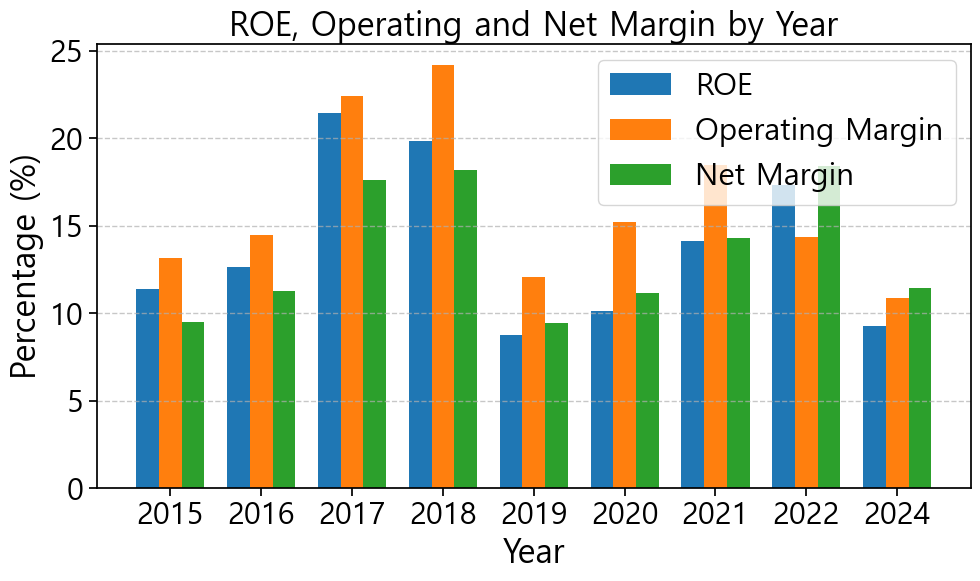

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# 연도 순 정렬
total = total.sort_values(by='bsns_year')

# x축 값
years = total['bsns_year'].astype(str).tolist()
x = np.arange(len(years))  # x 위치

# y축 값
roe = total['ROE']
oper = total['oper']
net = total['net']

# 바 너비
width = 0.25

# 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(x - width, roe, width=width, label='ROE')
plt.bar(x, oper, width=width, label='Operating Margin')
plt.bar(x + width, net, width=width, label='Net Margin')

# 축 설정
plt.xticks(x, years)
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.title('ROE, Operating and Net Margin by Year')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import requests
import json

# 0. 분석 대상 기업 리스트 정의 (정확한 기업명)
# 이 이름은 DART에서 사용하는 'corp_name'과 정확히 일치해야 함
target_names = ['삼성전자', 'SK하이닉스']

# 1. pub_com 데이터프레임에서 정확한 기업명을 기준으로 대상 기업 필터링
corp_df = pub_com[pub_com['corp_name'].isin(target_names)].reset_index(drop=True)

# 2. 최종 결과를 저장할 빈 데이터프레임 생성
# 각 row는 기업-연도-계정별 재무제표 항목을 저장
columns = [
    'corp_code',       # DART 고유 기업 코드
    'corp_name',       # 기업명
    'bsns_year',       # 사업연도
    'sj_div',          # 재무제표 종류 (예: BS: 재무상태표, IS: 손익계산서)
    'account_nm',      # 계정명 (예: 자산총계, 부채총계 등)
    'thstrm_nm',       # 당기명 (예: 제10기)
    'thstrm_amount',   # 당기 금액
    'frmtrm_nm',       # 전기명 (예: 제9기)
    'frmtrm_amount'    # 전기 금액
]
df_rslt = pd.DataFrame(columns=columns)

# 3. 반복에 사용할 설정값 정의
bs_years = range(2015, 2025)  # 2015년부터 2024년까지의 사업연도에 대해 수집
reprt_code = 11011            # '사업보고서' 보고서 코드 (11011은 사업보고서, 11012는 반기보고서 등)
fs_div = 'CFS'                # 연결재무제표 기준 (CFS: 연결, OFS: 개별)

# 4. 대상 기업별로 반복
for _, row in corp_df.iterrows():
    corp_code = row['corp_code']   # 기업 고유 코드
    corp_name = row['corp_name']   # 기업명

    print(f"{corp_name} ({corp_code}) 재무제표 수집 시작")

    # 5. 연도별로 반복해서 API 호출
    for year in bs_years:
        # API 요청 URL 및 파라미터 구성
        url = "https://opendart.fss.or.kr/api/fnlttSinglAcntAll.json"
        params = {
            'crtfc_key': api_key,        # 본인의 DART API 인증키
            'corp_code': corp_code,      # 기업 고유 코드
            'bsns_year': year,           # 사업연도
            'reprt_code': reprt_code,    # 보고서 코드 (11011 = 사업보고서)
            'fs_div': fs_div             # 재무제표 유형 (CFS = 연결재무제표)
        }

        # API 요청
        response = requests.get(url, params=params)

        # 응답을 JSON 형식으로 변환
        data = response.json()

        # 6. 유효한 데이터가 있을 경우 ('list' 키가 응답에 존재)
        if 'list' in data:
            for item in data['list']:
                # 재무제표 각 항목별로 필요한 값만 추출해서 결과 데이터프레임에 추가
                df_rslt.loc[len(df_rslt)] = [
                    corp_code,                  # 기업 고유코드
                    corp_name,                  # 기업 이름
                    item["bsns_year"],          # 사업연도
                    item["sj_div"],             # 재무제표 구분
                    item["account_nm"],         # 계정명
                    item["thstrm_nm"],          # 당기명 (예: 제10기)
                    item["thstrm_amount"],      # 당기 금액
                    item["frmtrm_nm"],          # 전기명 (예: 제9기)
                    item["frmtrm_amount"]       # 전기 금액
                ]
        else:
            # API 응답에 'list'가 없으면 해당 연도는 데이터가 없음
            print(f" - {year}년 데이터 없음 (메시지: {data.get('message', 'No message')})")

# 7. 전체 수집 완료 후 결과 출력
print("모든 기업의 데이터 수집 완료!")
print("총 수집된 행 수:", len(df_rslt))

# 8. 결과 확인 (필요 시 Excel로 저장 가능)
df_rslt.head()  
df_rslt.to_excel("result.xlsx", index=False)

SK하이닉스 (00164779) 재무제표 수집 시작
삼성전자 (00126380) 재무제표 수집 시작
모든 기업의 데이터 수집 완료!
총 수집된 행 수: 3655


In [ ]:
set(df_rslt['corp_name'])

{'SK하이닉스', '삼성전자'}

In [ ]:
set(df_rslt[df_rslt['corp_name'] == 'SK하이닉스']['bsns_year'])

{'2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024'}

In [ ]:
set(df_rslt[df_rslt['corp_name'] == '삼성전자']['bsns_year'])

{'2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024'}

In [ ]:
set(df_rslt[df_rslt['corp_name']=='SK하이닉스']['account_nm'])

{'관계기업 및 공동기업투자',
 '관계기업의 기타포괄손익에 대한 지분',
 '관계기업투자의 처분',
 '관계기업투자의 취득',
 '금융비용',
 '금융수익',
 '기말 현금및현금성자산',
 '기말자본',
 '기말현금및현금성자산',
 '기본주당순이익',
 '기본주당이익(손실)',
 '기본주당이익(원)',
 '기업회계기준서 제 1109호 최초적용에 따른 조정',
 '기초 현금및현금성자산',
 '기초자본',
 '기초현금및현금성자산',
 '기타',
 '기타 비유동 부채',
 '기타 유동부채',
 '기타금융부채',
 '기타금융자산',
 '기타금융자산의 감소',
 '기타금융자산의 증가',
 '기타금융자산의 처분(취득)',
 '기타금융자산의 취득',
 '기타비유동부채',
 '기타비유동자산',
 '기타수취채권',
 '기타수취채권의 감소',
 '기타수취채권의 증가',
 '기타영업외비용',
 '기타영업외수익',
 '기타유동부채',
 '기타유동자산',
 '기타자본',
 '기타지급채무',
 '기타포괄손익',
 '기타포괄손익누계액',
 '단기금융상품',
 '단기금융상품의 감소',
 '단기금융상품의 순증감',
 '단기금융상품의 증가',
 '단기미지급금',
 '단기투자자산',
 '단기투자자산의 순증감',
 '당기법인세부채',
 '당기법인세자산',
 '당기손익으로 재분류되는 세후기타포괄손익',
 '당기손익으로 재분류되지 않는 세후기타포괄손익',
 '당기순이익',
 '당기순이익(손실)',
 '리스부채',
 '리스부채의 상환',
 '매각예정자산',
 '매각예정자산의 처분',
 '매도가능금융자산',
 '매도가능금융자산의 처분',
 '매도가능금융자산의 취득',
 '매도가능금융자산평가손익',
 '매입채무',
 '매출액',
 '매출원가',
 '매출채권',
 '매출총이익',
 '매출총이익(손실)',
 '무형자산',
 '무형자산의 처분',
 '무형자산의 취득',
 '미지급금',
 '배당금수취',
 '배당금의 수취',
 '배당금의 지급',
 '배당금지급',
 '법인세납부(환급)',
 '법인세비용',
 

In [ ]:
set(df_rslt[df_rslt['corp_name']=='삼성전자']['account_nm'])

{'계속영업이익(손실)',
 '관계기업 및 공동기업 투자',
 '관계기업 및 공동기업 투자의 처분',
 '관계기업 및 공동기업 투자의 취득',
 '관계기업 및 공동기업의 기타포괄손익에 대한 지분',
 '관계종속기업투자자산-지분법',
 '금융비용',
 '금융수익',
 '기말 현금 및 현금성자산',
 '기말의 현금및현금성자산',
 '기말자본',
 '기말현금및현금성자산',
 '기본주당이익',
 '기본주당이익(손실)',
 '기본주당이익(손실) (단위:원)',
 '기초 현금 및 현금성자산',
 '기초의 현금및현금성자산',
 '기초자본',
 '기초현금및현금성자산',
 '기타',
 '기타 비유동 부채',
 '기타 유동부채',
 '기타 투자활동으로 인한 현금유출입액',
 '기타비용',
 '기타비유동부채',
 '기타비유동자산',
 '기타손실',
 '기타수익',
 '기타유동부채',
 '기타유동자산',
 '기타이익',
 '기타자본항목',
 '기타투자활동으로 인한 현금유출입액',
 '기타포괄손익',
 '기타포괄손익(*4)',
 '기타포괄손익-공정가치 측정 비유동금융자산',
 '기타포괄손익-공정가치금융자산',
 '기타포괄손익-공정가치금융자산의 처분',
 '기타포괄손익-공정가치금융자산의 취득',
 '기타포괄손익-공정가치금융자산평가손익',
 '기타포괄손익-공정가치측정금융자산의처분',
 '기타포괄손익-공정가치측정금융자산의취득',
 '단기금융상품',
 '단기금융상품의 순감소(증가)',
 '단기금융상품의 순증가',
 '단기당기손익-공정가치금융자산',
 '단기당기손익-공정가치금융자산의 순감소(증가)',
 '단기당기손익-공정가치금융자산의 순증가',
 '단기매도가능금융자산',
 '단기매도가능금융자산의 처분',
 '단기매도가능금융자산의 취득',
 '단기상각후원가금융자산',
 '단기상각후원가금융자산의 순감소(증가)',
 '단기상각후원가금융자산의 순증가',
 '단기차입금',
 '단기차입금의 순증가',
 '단기차입금의 순증가(감소)',
 '단기차입금의 순증가(감소) (주27)',
 '당기법인세부채',
 

In [ ]:
equity=df_rslt[(df_rslt['account_nm'].str.contains('지배기업'))&(df_rslt['sj_div']=='BS')]\
      [['corp_code','corp_name','bsns_year','thstrm_amount','frmtrm_amount']]

equity.rename(columns = {'thstrm_amount': 'thstrm_equity', \
                              'frmtrm_amount' : 'frmtrm_equity'},inplace=True)
equity[['thstrm_equity','frmtrm_equity']]=equity[['thstrm_equity','frmtrm_equity']].apply(pd.to_numeric)
equity['Avg_equity']=equity[['thstrm_equity','frmtrm_equity']].mean(axis='columns')

equity.sort_values(by=['bsns_year','corp_name'], inplace=True)

equity.head(10)

,corp_code,corp_name,bsns_year,thstrm_equity,frmtrm_equity,Avg_equity
38,00164779,SK하이닉스,2015,21386863000000,18036453000000,1.971166e+13
1730,00126380,삼성전자,2015,172876767000000,162181725000000,1.675292e+14
203,00164779,SK하이닉스,2016,24016955000000,21386863000000,2.270191e+13
1915,00126380,삼성전자,2016,186424328000000,172876767000000,1.796505e+14
372,00164779,SK하이닉스,2017,33815280000000,24016955000000,2.891612e+13
2104,00126380,삼성전자,2017,207213416000000,186424328000000,1.968189e+14
521,00164779,SK하이닉스,2018,46845719000000,33815280000000,4.033050e+13
2306,00126380,삼성전자,2018,240068993000000,207213416000000,2.236412e+14
678,00164779,SK하이닉스,2019,47928415000000,46845719000000,4.738707e+13
2521,00126380,삼성전자,2019,254915472000000,240068993000000,2.474922e+14


In [ ]:
Return = df_rslt[(df_rslt['account_nm'].str.contains('당기순이익'))&
                   (df_rslt['sj_div']=='CIS')][['corp_code','corp_name',
                                                'bsns_year','thstrm_amount']]

Return.rename(columns={'thstrm_amount' : 'thstrm_return'}, inplace=True)
Return['thstrm_return']=Return['thstrm_return'].apply(pd.to_numeric)

Return.head(10)

,corp_code,corp_name,bsns_year,thstrm_return
59,00164779,SK하이닉스,2015,4323595000000
224,00164779,SK하이닉스,2016,2960483000000
393,00164779,SK하이닉스,2017,10642219000000
542,00164779,SK하이닉스,2018,15539984000000
699,00164779,SK하이닉스,2019,2016391000000
863,00164779,SK하이닉스,2020,4758914000000
1021,00164779,SK하이닉스,2021,9616188000000
1182,00164779,SK하이닉스,2022,2241669000000
1355,00164779,SK하이닉스,2023,-9137547000000
1526,00164779,SK하이닉스,2024,19796902000000


In [ ]:
ROE=pd.merge(equity,Return,on=['corp_code','corp_name','bsns_year'],how='inner')
ROE['ROE'] = ROE['thstrm_return']/ROE['Avg_equity']*100

ROE.sort_values(by=["corp_name","bsns_year"],inplace=True)
ROE

,corp_code,corp_name,bsns_year,thstrm_equity,frmtrm_equity,Avg_equity,thstrm_return,ROE
0,00164779,SK하이닉스,2015,21386863000000,18036453000000,1.971166e+13,4323595000000,21.934203
2,00164779,SK하이닉스,2016,24016955000000,21386863000000,2.270191e+13,2960483000000,13.040679
4,00164779,SK하이닉스,2017,33815280000000,24016955000000,2.891612e+13,10642219000000,36.803762
6,00164779,SK하이닉스,2018,46845719000000,33815280000000,4.033050e+13,15539984000000,38.531593
8,00164779,SK하이닉스,2019,47928415000000,46845719000000,4.738707e+13,2016391000000,4.255150
10,00164779,SK하이닉스,2020,51888541000000,47921102000000,4.990482e+13,4758914000000,9.535980
12,00164779,SK하이닉스,2021,62157072000000,51888541000000,5.702281e+13,9616188000000,16.863758
14,00164779,SK하이닉스,2022,63266355000000,62157072000000,6.271171e+13,2241669000000,3.574562
16,00164779,SK하이닉스,2023,53504285000000,63266355000000,5.838532e+13,-9137547000000,-15.650419
18,00164779,SK하이닉스,2024,73903394000000,53504285000000,6.370384e+13,19796902000000,31.076466


C:\Users\songj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


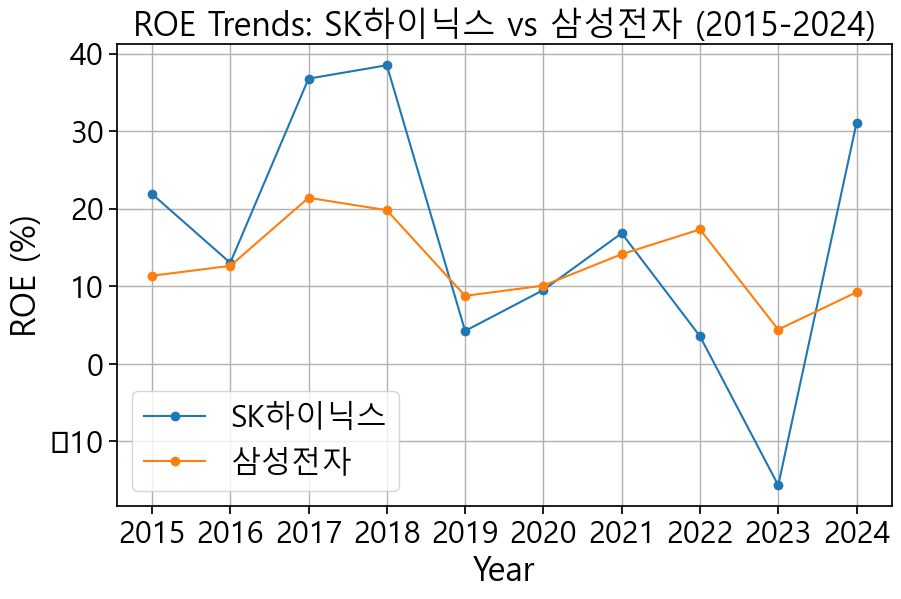

In [ ]:
plt.figure(figsize=(10, 6))
for corp in ROE['corp_name'].unique():
    corp_data = ROE[ROE['corp_name'] == corp]
    plt.plot(corp_data['bsns_year'], corp_data['ROE'], marker='o', label=corp)

plt.title('ROE Trends: SK하이닉스 vs 삼성전자 (2015-2024)')
plt.xlabel('Year')
plt.ylabel('ROE (%)')
plt.legend()
plt.grid()
plt.show()

C:\Users\songj\AppData\Local\Temp\ipykernel_8708\1856520302.py:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\songj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


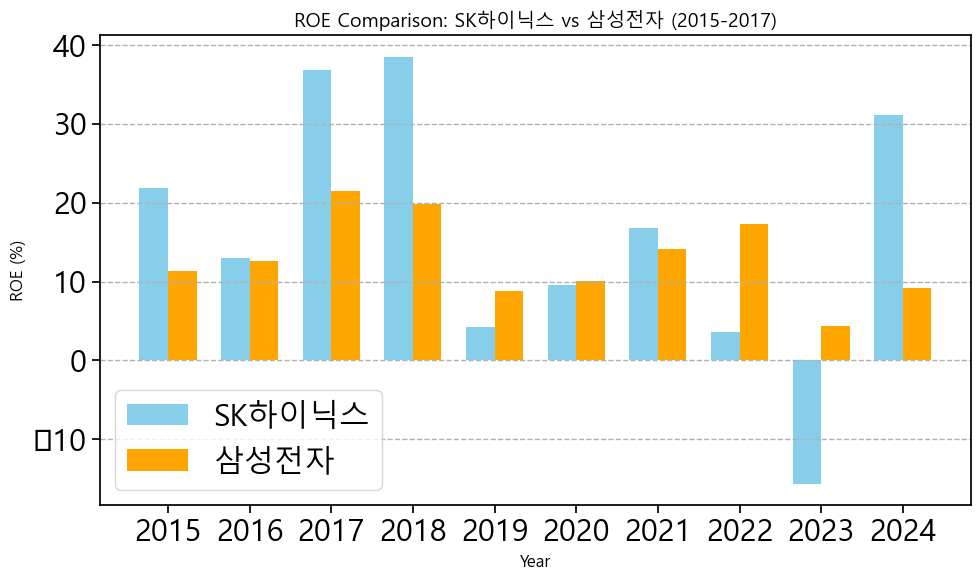

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 연도와 회사별 데이터 추출
years = ROE['bsns_year'].unique()  # 연도 추출
width = 0.35  # 막대 너비 설정

# SK하이닉스와 삼성전자의 ROE 값 추출
roe_sk = ROE[ROE['corp_name'] == 'SK하이닉스']['ROE']
roe_samsung = ROE[ROE['corp_name'] == '삼성전자']['ROE']

x = np.arange(len(years))  # x축 위치 설정

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, roe_sk, width, label='SK하이닉스', color='skyblue')
plt.bar(x + width/2, roe_samsung, width, label='삼성전자', color='orange')

# 그래프 꾸미기
plt.title('ROE Comparison: SK하이닉스 vs 삼성전자 (2015-2017)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('ROE (%)', fontsize=12)
plt.xticks(x, years)  # x축에 연도 표시
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# 그래프 표시
plt.show()